In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import pickle
import gc
import re
# ここから自作
import model
import result
import mode
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
# 時刻を表示してくれるようになるprint関数のwrapper
def datePrint(*args, **kwargs):
    from datetime import datetime
    print(datetime.now().strftime('[%Y/%m/%d %H:%M:%S] '), end="")
    print(*args, **kwargs)

In [3]:
datePrint("loading pickle data")
input_val0 = pickle.load(open("../data/max_span100/input_test0.pkl","rb"))
target_val0 = pickle.load(open("../data/max_span100/target_test0.pkl","rb")) #256のみ
target_val0 = torch.flip(target_val0, dims=[1])
input_train0 = pickle.load(open("../data/max_span100/input_train0.pkl","rb"))
target_train0 = pickle.load(open("../data/max_span100/target_train0.pkl","rb")) #256以下
target_train0 = torch.flip(target_train0, dims=[1])
input_val1 = pickle.load(open("../data/max_span100/input_test0.pkl","rb"))
target_val1 = pickle.load(open("../data/max_span100/target_test0.pkl","rb")) #256のみ
target_val1 = torch.flip(target_val1, dims=[1])
input_train1 = pickle.load(open("../data/max_span100/input_train0.pkl","rb"))
target_train1 = pickle.load(open("../data/max_span100/target_train0.pkl","rb")) #256以下
target_train1 = torch.flip(target_train1, dims=[1])

input_all = torch.cat([input_train0, input_val0, input_train1, input_val1], dim=0)
target_all = torch.cat([target_train0, target_val0, target_train1, target_val1], dim=0)
dataset = model.Dataset(input_all, target_all)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [1800000, 200000])

del input_val0, target_val0, input_train0, target_train0, input_val1, target_val1, input_train1, target_train1
gc.collect()

[2021/04/05 11:45:11] loading pickle data


0

In [4]:
'''
datePrint("loading pickle data")
input_val = pickle.load(open("../data/acc_len5_random256/input_test.pkl","rb"))
target_val = pickle.load(open("../data/acc_len5_random256/target_test.pkl","rb")) #256のみ
target_val = torch.flip(target_val, dims=[1])
input_train = pickle.load(open("../data/acc_len5_random256/input_train.pkl","rb"))
target_train = pickle.load(open("../data/acc_len5_random256/target_train.pkl","rb")) #256以下
target_train = torch.flip(target_train, dims=[1])
input_train_2 = pickle.load(open("../data/acc_len5_random256/input_train_2.pkl","rb"))
target_train_2 = pickle.load(open("../data/acc_len5_random256/target_train_2.pkl","rb")) #256以下
target_train_2 = torch.flip(target_train_2, dims=[1])
input_train_3 = pickle.load(open("../data/acc_len5_random256/input_train_3.pkl","rb"))
target_train_3 = pickle.load(open("../data/acc_len5_random256/target_train_3.pkl","rb")) #256のみ
target_train_3 = torch.flip(target_train_3, dims=[1])

input_all = torch.cat([input_train, input_train_2, input_train_3, input_val], dim=0)
target_all = torch.cat([target_train, target_train_2, target_train_3, target_val], dim=0)
dataset = model.Dataset(input_all, target_all)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [1700000, 300000])

del input_val, target_val, input_train, target_train, input_train_2, target_train_2, input_train_3, target_train_3, input_all, target_all
gc.collect()
'''

'\ndatePrint("loading pickle data")\ninput_val = pickle.load(open("../data/acc_len5_random256/input_test.pkl","rb"))\ntarget_val = pickle.load(open("../data/acc_len5_random256/target_test.pkl","rb")) #256のみ\ntarget_val = torch.flip(target_val, dims=[1])\ninput_train = pickle.load(open("../data/acc_len5_random256/input_train.pkl","rb"))\ntarget_train = pickle.load(open("../data/acc_len5_random256/target_train.pkl","rb")) #256以下\ntarget_train = torch.flip(target_train, dims=[1])\ninput_train_2 = pickle.load(open("../data/acc_len5_random256/input_train_2.pkl","rb"))\ntarget_train_2 = pickle.load(open("../data/acc_len5_random256/target_train_2.pkl","rb")) #256以下\ntarget_train_2 = torch.flip(target_train_2, dims=[1])\ninput_train_3 = pickle.load(open("../data/acc_len5_random256/input_train_3.pkl","rb"))\ntarget_train_3 = pickle.load(open("../data/acc_len5_random256/target_train_3.pkl","rb")) #256のみ\ntarget_train_3 = torch.flip(target_train_3, dims=[1])\n\ninput_all = torch.cat([input_train,

In [5]:
import math
def lambda_epoch(epoch):
    # スケジューラの設定
    max_epoch = 20
    return math.pow((1-epoch/max_epoch), 0.9)

[2021/04/05 11:45:19] 0 layer 0 flag


Epoch 1/20
train Loss:2.344923709826999 Timer:2904.814151763916
val Loss:1.9487362767791747 Timer:85.55514621734619
Epoch 2/20
train Loss:1.8134469500520494 Timer:2911.2234601974487
val Loss:1.6996072887420655 Timer:85.54631543159485
Epoch 3/20
train Loss:1.6074189436297948 Timer:2927.1498436927795
val Loss:1.5544565022277832 Timer:85.93825364112854
Epoch 4/20
train Loss:1.4760586109118992 Timer:2926.8050866127014
val Loss:1.4353813780593871 Timer:85.57368445396423
Epoch 5/20
train Loss:1.388045056429969 Timer:2922.287640810013
val Loss:1.359633796081543 Timer:99.06159448623657


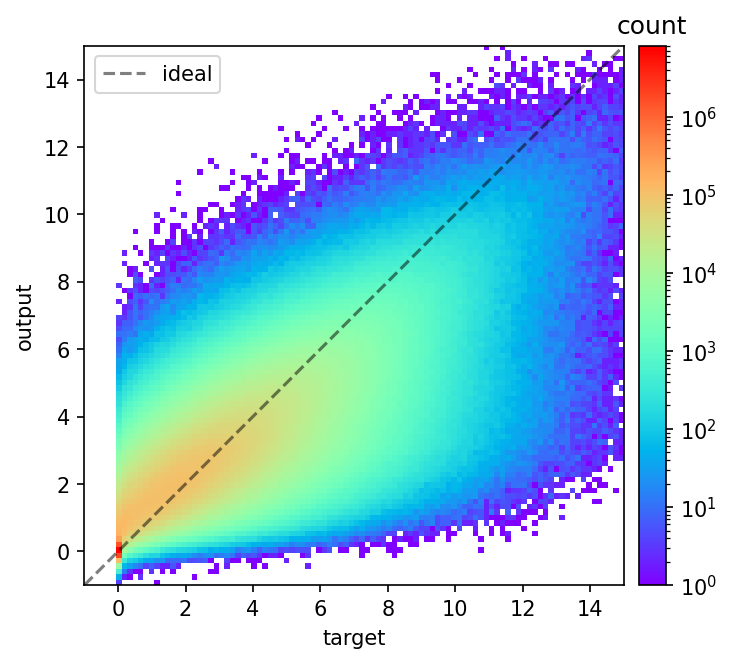

Epoch 6/20
train Loss:1.3270278355174594 Timer:2920.341465950012
val Loss:1.3176473664474486 Timer:86.90997314453125
Epoch 7/20
train Loss:1.2802543310568069 Timer:2937.625609397888
val Loss:1.2793045966529846 Timer:85.67159986495972
Epoch 8/20
train Loss:1.2454408241738213 Timer:2911.3569254875183
val Loss:1.2526122234725952 Timer:85.40600109100342
Epoch 9/20
train Loss:1.2158742129092746 Timer:2915.8120856285095
val Loss:1.22123679895401 Timer:88.73411393165588
Epoch 10/20
train Loss:1.1892845911598207 Timer:2921.0276067256927
val Loss:1.2188133380889892 Timer:100.68132638931274


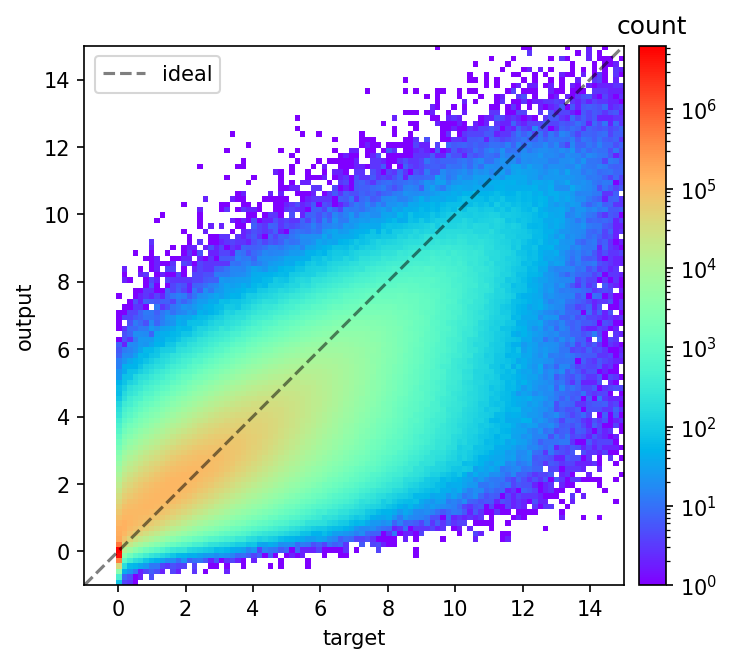

Epoch 11/20
train Loss:1.1696795634799533 Timer:2908.6652517318726
val Loss:1.1928473482704163 Timer:85.44760966300964
Epoch 12/20
train Loss:1.1499644359588623 Timer:2904.791882276535
val Loss:1.180941854763031 Timer:85.6074767112732
Epoch 13/20
train Loss:1.1305075567732916 Timer:2914.125832796097
val Loss:1.1642860200691223 Timer:85.99068307876587
Epoch 14/20
train Loss:1.1196921457184685 Timer:2914.017045736313
val Loss:1.1468572339057923 Timer:85.76371645927429
Epoch 15/20
train Loss:1.1010538858074612 Timer:2916.2337646484375
val Loss:1.1343225465965272 Timer:102.68345499038696


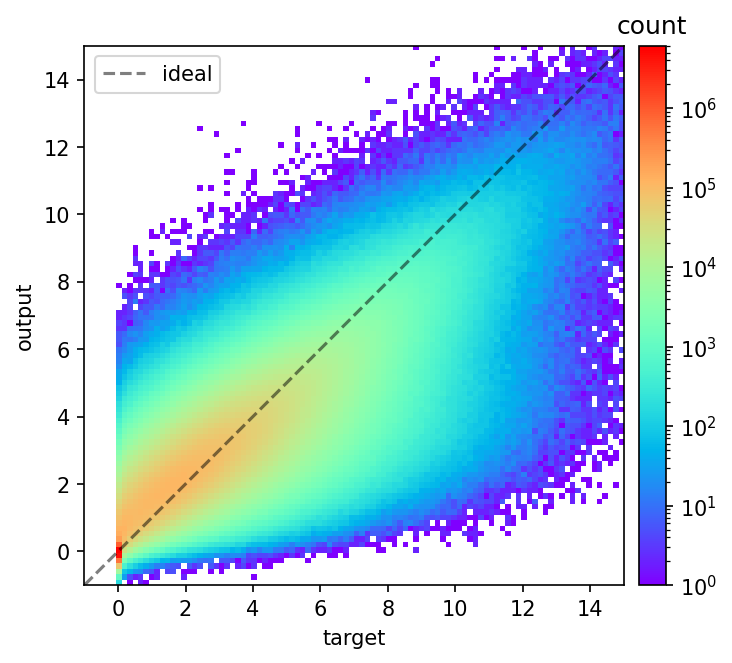

Epoch 16/20
train Loss:1.0847476179016962 Timer:2929.137707710266
val Loss:1.124167895526886 Timer:85.5685715675354
Epoch 17/20
train Loss:1.0711757632319132 Timer:2908.7050936222076
val Loss:1.1288992422676087 Timer:85.91151690483093
Epoch 18/20
train Loss:1.0586643764686585 Timer:2900.4861595630646
val Loss:1.115827085170746 Timer:85.33629631996155
Epoch 19/20
train Loss:1.0457838916926914 Timer:2907.125160217285
val Loss:1.0992546863746644 Timer:85.86559295654297
Epoch 20/20
train Loss:1.0331751320838929 Timer:2923.23135137558
val Loss:1.103208620262146 Timer:99.38795185089111


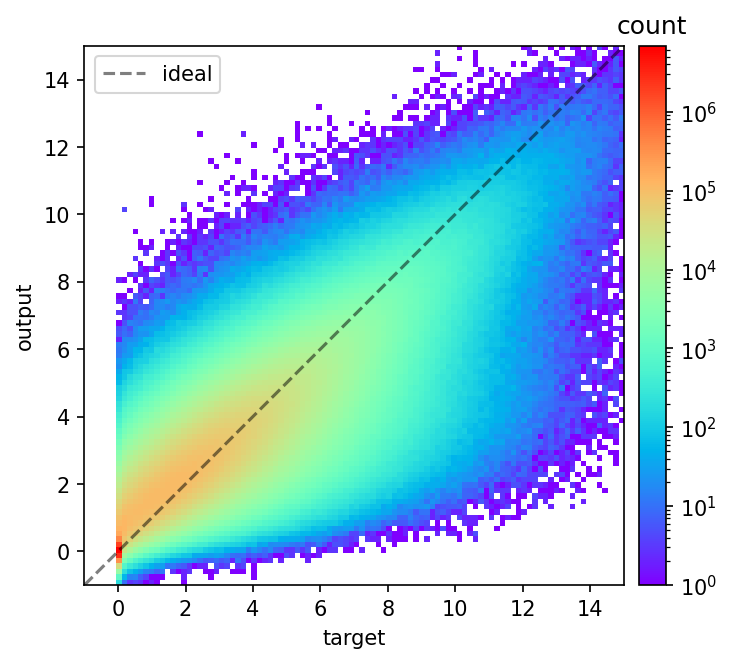

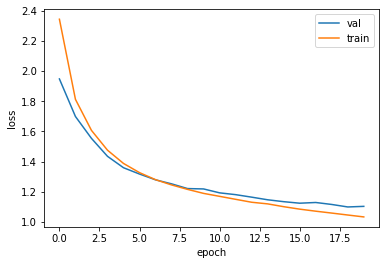

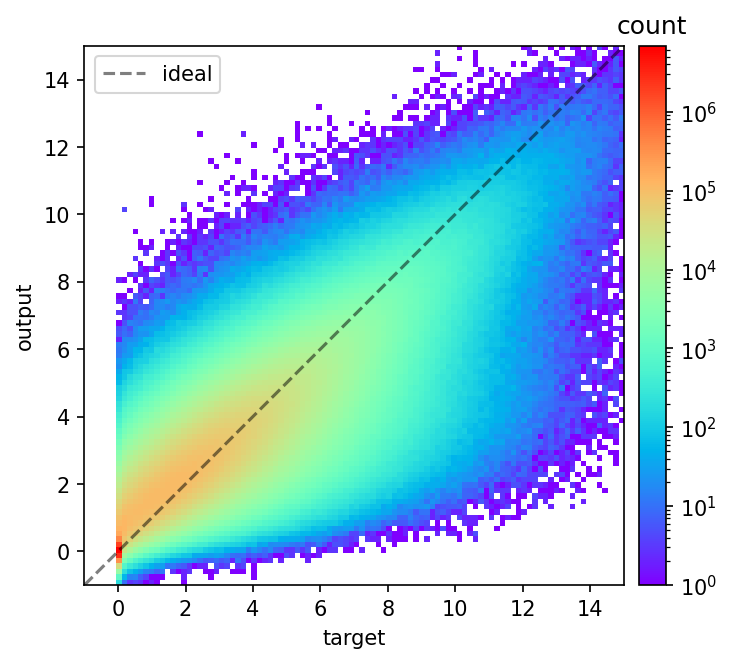

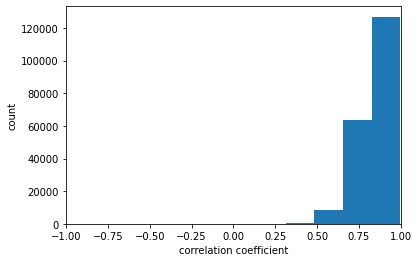

0.8449386506072084


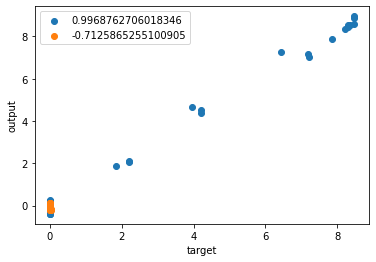

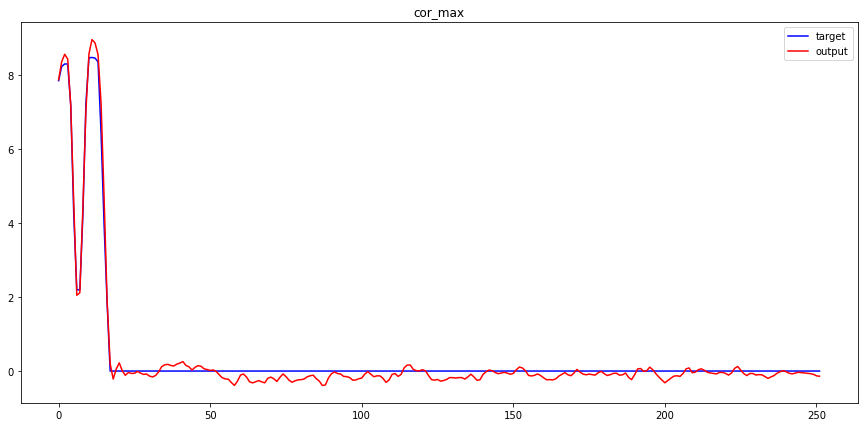

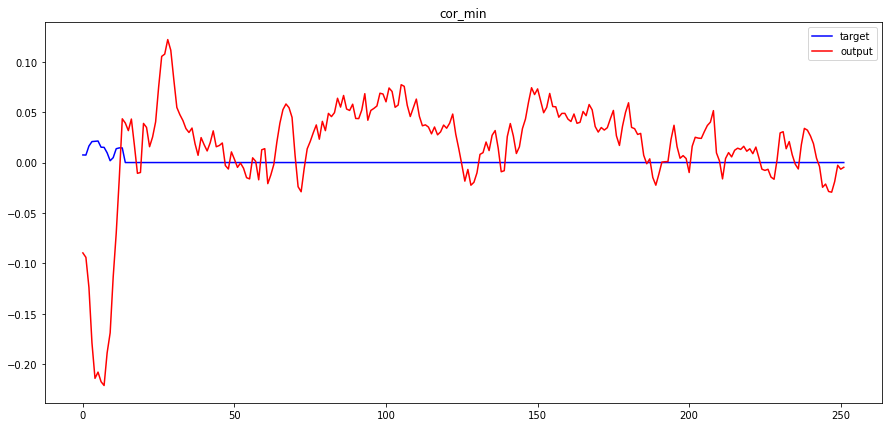

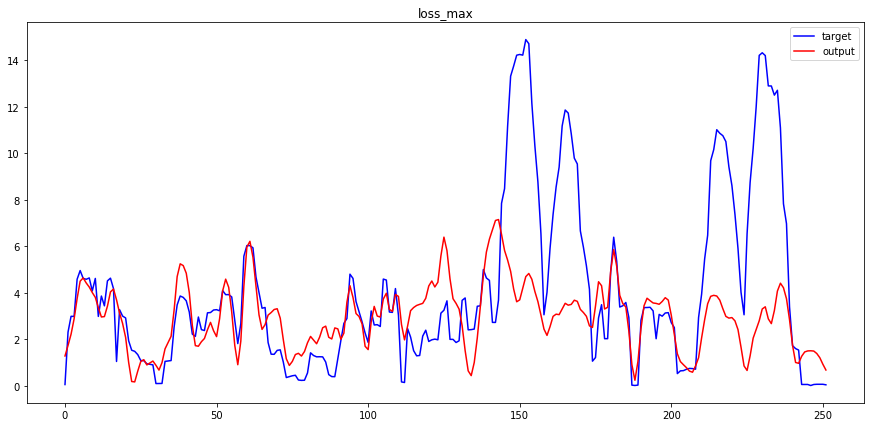

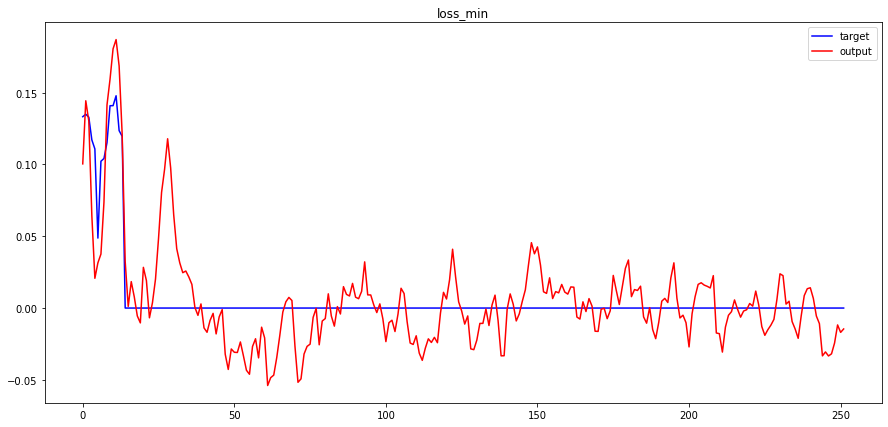

cor_max UUGCCACUUAAGUGGUAAUCC
cor_min GAAAACAUAAAAAAAUAU
loss_max CCUCCGGCGGGCCGUGGCGAGUCCUUCUACUUACAACGUUGGGUCAACCGCGAUCCCCCAACGGGUCUUUGCGUAACCAUCCAUCGUUUCCCUUCCGGGCACAGUGCAAGGGAGUCACCGUCGCGUCCCGGUCUAGACCCGACUGGACGAGCAGAUGGUUAUAAGUAUGCUUAGUGACUGCGGUGUCAUCCCACGAUAUCCGACCAAUUUUUUCUGAGUAUACUGUCAACCGUCUGCUCGGCCACUAGACCAGAAC
loss_min ACACGAUACCUGCUGAUU


In [6]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
dataloaders_dict = {'train': train_dataloader, 'val': val_dataloader}

for n in [0]:
    for x in [0]:
        datePrint(n, 'layer', x, 'flag')
        net = model.Fixed(num_layer=64, flag=False).to(device)
        net.apply(model.weight_init) #重みの初期化適用

        #ファインチューニング
#         optimizer = optim.Adam([{'params': net.embedding.parameters(), 'lr': 5e-4},
#                                 {'params': net.convs.parameters(), 'lr': 1e-4},
#                                 {'params': net.mid.parameters(), 'lr': 5e-4},
#                                 {'params': net.fc.parameters(), 'lr': 1e-3}], weight_decay=1e-6)
        optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-6, eps=1e-5)

        epochs = 20
        criterion = nn.MSELoss().to(device)
        
        
#         # 学習途中データ
#         checkpoint = torch.load('max_span100.pth')
#         net.load_state_dict(checkpoint['model_state_dict'])
#         optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#         epochs = checkpoint['epoch']
#         loss = checkpoint['loss']
        
        scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_epoch)
        train_loss_list, val_loss_list, data_all, target_all, output_all = mode.train(device, net, dataloaders_dict, criterion, optimizer, epochs)               
        torch.save(net.state_dict(), 'max_span100.pth')

        result.learning_curve(train_loss_list, val_loss_list, epochs)
        result.plot_result(np.array(target_all, dtype=object).reshape(-1), np.array(output_all, dtype=object).reshape(-1))
        cor_list, loss_list = result.cal_indicators(target_all, output_all)
        result.cor_hist(cor_list)
        result.scatter_minmax(cor_list, loss_list, target_all, output_all)
        result.visible_minmax(target_all, output_all, cor_list, loss_list)
        result.show_base(data_all, cor_list, loss_list)

In [7]:
# input_test = pickle.load(open("../data/test_sets/input_600_1000.pkl","rb"))
# target_test = pickle.load(open("../data/test_sets/target_600_1000.pkl","rb"))
input_test = pickle.load(open("../data/RF00156/input_RF00156.pkl","rb"))
target_test = pickle.load(open("../data/RF00156/target_RF00156.pkl","rb"))
target_test = torch.flip(target_test, dims=[1])
datePrint(input_test.shape)
datePrint(target_test.shape)
if (input_test.shape[1]%256 != 0):
    input_test = F.pad(input_test, (0, 256-input_test.shape[1]%256))
    target_test = F.pad(target_test, (0, 252-target_test.shape[1]%256))
if (input_test.shape[1]>256):
    transform = True
    division = (input_test.shape[1])//128 - 1
    input_init = input_test
    input_test = input_test.unfold(1, 256, 128).reshape(-1, 256)
    target_test = target_test.unfold(1, 252, 128).reshape(-1, 252)
else:
    transform = False
datePrint(input_test.shape)
datePrint(target_test.shape)
test_dataset = model.Dataset(input_test, target_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle=False, num_workers=1)

net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('max_span100.pth'))
criterion = nn.MSELoss().to(device)

start = time.time()
test_loss, data_all, target_all, output_all = mode.test(device, net, test_dataloader, criterion) 
datePrint('finish prediction loss', test_loss)
if (transform==True):
    target_tmp = torch.tensor(target_all)
    output_tmp = torch.tensor(output_all)
    output_tmp = F.relu(output_tmp)
    for n in range(division):
        if (n==0):
            target_all = target_tmp[n::division, :192]
            output_all = output_tmp[n::division, :192]
        elif (n==division-1):
            target_all = torch.cat([target_all, target_tmp[n::division, 64:]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
        else:
            target_all = torch.cat([target_all, target_tmp[n::division, 64:192]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
    data_all = input_init.numpy()
    target_all = target_all.numpy()
    output_all = output_all.numpy()
finish = time.time()
np.savetxt('accessibility_output.txt', output_all, fmt='%.3e')
finish = time.time()
datePrint('予測時間', (finish-start))

[2021/04/06 04:28:27] torch.Size([1332, 256])
[2021/04/06 04:28:27] torch.Size([1332, 252])
[2021/04/06 04:28:27] torch.Size([1332, 256])
[2021/04/06 04:28:27] torch.Size([1332, 252])


RuntimeError: Error(s) in loading state_dict for Fixed:
	Unexpected key(s) in state_dict: "convs.16.conv.weight", "convs.16.conv.bias", "convs.16.batchnorm.weight", "convs.16.batchnorm.bias", "convs.16.batchnorm.running_mean", "convs.16.batchnorm.running_var", "convs.16.batchnorm.num_batches_tracked", "convs.17.conv.weight", "convs.17.conv.bias", "convs.17.batchnorm.weight", "convs.17.batchnorm.bias", "convs.17.batchnorm.running_mean", "convs.17.batchnorm.running_var", "convs.17.batchnorm.num_batches_tracked", "convs.18.conv.weight", "convs.18.conv.bias", "convs.18.batchnorm.weight", "convs.18.batchnorm.bias", "convs.18.batchnorm.running_mean", "convs.18.batchnorm.running_var", "convs.18.batchnorm.num_batches_tracked", "convs.19.conv.weight", "convs.19.conv.bias", "convs.19.batchnorm.weight", "convs.19.batchnorm.bias", "convs.19.batchnorm.running_mean", "convs.19.batchnorm.running_var", "convs.19.batchnorm.num_batches_tracked", "convs.20.conv.weight", "convs.20.conv.bias", "convs.20.batchnorm.weight", "convs.20.batchnorm.bias", "convs.20.batchnorm.running_mean", "convs.20.batchnorm.running_var", "convs.20.batchnorm.num_batches_tracked", "convs.21.conv.weight", "convs.21.conv.bias", "convs.21.batchnorm.weight", "convs.21.batchnorm.bias", "convs.21.batchnorm.running_mean", "convs.21.batchnorm.running_var", "convs.21.batchnorm.num_batches_tracked", "convs.22.conv.weight", "convs.22.conv.bias", "convs.22.batchnorm.weight", "convs.22.batchnorm.bias", "convs.22.batchnorm.running_mean", "convs.22.batchnorm.running_var", "convs.22.batchnorm.num_batches_tracked", "convs.23.conv.weight", "convs.23.conv.bias", "convs.23.batchnorm.weight", "convs.23.batchnorm.bias", "convs.23.batchnorm.running_mean", "convs.23.batchnorm.running_var", "convs.23.batchnorm.num_batches_tracked", "convs.24.conv.weight", "convs.24.conv.bias", "convs.24.batchnorm.weight", "convs.24.batchnorm.bias", "convs.24.batchnorm.running_mean", "convs.24.batchnorm.running_var", "convs.24.batchnorm.num_batches_tracked", "convs.25.conv.weight", "convs.25.conv.bias", "convs.25.batchnorm.weight", "convs.25.batchnorm.bias", "convs.25.batchnorm.running_mean", "convs.25.batchnorm.running_var", "convs.25.batchnorm.num_batches_tracked", "convs.26.conv.weight", "convs.26.conv.bias", "convs.26.batchnorm.weight", "convs.26.batchnorm.bias", "convs.26.batchnorm.running_mean", "convs.26.batchnorm.running_var", "convs.26.batchnorm.num_batches_tracked", "convs.27.conv.weight", "convs.27.conv.bias", "convs.27.batchnorm.weight", "convs.27.batchnorm.bias", "convs.27.batchnorm.running_mean", "convs.27.batchnorm.running_var", "convs.27.batchnorm.num_batches_tracked", "convs.28.conv.weight", "convs.28.conv.bias", "convs.28.batchnorm.weight", "convs.28.batchnorm.bias", "convs.28.batchnorm.running_mean", "convs.28.batchnorm.running_var", "convs.28.batchnorm.num_batches_tracked", "convs.29.conv.weight", "convs.29.conv.bias", "convs.29.batchnorm.weight", "convs.29.batchnorm.bias", "convs.29.batchnorm.running_mean", "convs.29.batchnorm.running_var", "convs.29.batchnorm.num_batches_tracked", "convs.30.conv.weight", "convs.30.conv.bias", "convs.30.batchnorm.weight", "convs.30.batchnorm.bias", "convs.30.batchnorm.running_mean", "convs.30.batchnorm.running_var", "convs.30.batchnorm.num_batches_tracked", "convs.31.conv.weight", "convs.31.conv.bias", "convs.31.batchnorm.weight", "convs.31.batchnorm.bias", "convs.31.batchnorm.running_mean", "convs.31.batchnorm.running_var", "convs.31.batchnorm.num_batches_tracked", "convs.32.conv.weight", "convs.32.conv.bias", "convs.32.batchnorm.weight", "convs.32.batchnorm.bias", "convs.32.batchnorm.running_mean", "convs.32.batchnorm.running_var", "convs.32.batchnorm.num_batches_tracked", "convs.33.conv.weight", "convs.33.conv.bias", "convs.33.batchnorm.weight", "convs.33.batchnorm.bias", "convs.33.batchnorm.running_mean", "convs.33.batchnorm.running_var", "convs.33.batchnorm.num_batches_tracked", "convs.34.conv.weight", "convs.34.conv.bias", "convs.34.batchnorm.weight", "convs.34.batchnorm.bias", "convs.34.batchnorm.running_mean", "convs.34.batchnorm.running_var", "convs.34.batchnorm.num_batches_tracked", "convs.35.conv.weight", "convs.35.conv.bias", "convs.35.batchnorm.weight", "convs.35.batchnorm.bias", "convs.35.batchnorm.running_mean", "convs.35.batchnorm.running_var", "convs.35.batchnorm.num_batches_tracked", "convs.36.conv.weight", "convs.36.conv.bias", "convs.36.batchnorm.weight", "convs.36.batchnorm.bias", "convs.36.batchnorm.running_mean", "convs.36.batchnorm.running_var", "convs.36.batchnorm.num_batches_tracked", "convs.37.conv.weight", "convs.37.conv.bias", "convs.37.batchnorm.weight", "convs.37.batchnorm.bias", "convs.37.batchnorm.running_mean", "convs.37.batchnorm.running_var", "convs.37.batchnorm.num_batches_tracked", "convs.38.conv.weight", "convs.38.conv.bias", "convs.38.batchnorm.weight", "convs.38.batchnorm.bias", "convs.38.batchnorm.running_mean", "convs.38.batchnorm.running_var", "convs.38.batchnorm.num_batches_tracked", "convs.39.conv.weight", "convs.39.conv.bias", "convs.39.batchnorm.weight", "convs.39.batchnorm.bias", "convs.39.batchnorm.running_mean", "convs.39.batchnorm.running_var", "convs.39.batchnorm.num_batches_tracked", "convs.40.conv.weight", "convs.40.conv.bias", "convs.40.batchnorm.weight", "convs.40.batchnorm.bias", "convs.40.batchnorm.running_mean", "convs.40.batchnorm.running_var", "convs.40.batchnorm.num_batches_tracked", "convs.41.conv.weight", "convs.41.conv.bias", "convs.41.batchnorm.weight", "convs.41.batchnorm.bias", "convs.41.batchnorm.running_mean", "convs.41.batchnorm.running_var", "convs.41.batchnorm.num_batches_tracked", "convs.42.conv.weight", "convs.42.conv.bias", "convs.42.batchnorm.weight", "convs.42.batchnorm.bias", "convs.42.batchnorm.running_mean", "convs.42.batchnorm.running_var", "convs.42.batchnorm.num_batches_tracked", "convs.43.conv.weight", "convs.43.conv.bias", "convs.43.batchnorm.weight", "convs.43.batchnorm.bias", "convs.43.batchnorm.running_mean", "convs.43.batchnorm.running_var", "convs.43.batchnorm.num_batches_tracked", "convs.44.conv.weight", "convs.44.conv.bias", "convs.44.batchnorm.weight", "convs.44.batchnorm.bias", "convs.44.batchnorm.running_mean", "convs.44.batchnorm.running_var", "convs.44.batchnorm.num_batches_tracked", "convs.45.conv.weight", "convs.45.conv.bias", "convs.45.batchnorm.weight", "convs.45.batchnorm.bias", "convs.45.batchnorm.running_mean", "convs.45.batchnorm.running_var", "convs.45.batchnorm.num_batches_tracked", "convs.46.conv.weight", "convs.46.conv.bias", "convs.46.batchnorm.weight", "convs.46.batchnorm.bias", "convs.46.batchnorm.running_mean", "convs.46.batchnorm.running_var", "convs.46.batchnorm.num_batches_tracked", "convs.47.conv.weight", "convs.47.conv.bias", "convs.47.batchnorm.weight", "convs.47.batchnorm.bias", "convs.47.batchnorm.running_mean", "convs.47.batchnorm.running_var", "convs.47.batchnorm.num_batches_tracked", "convs.48.conv.weight", "convs.48.conv.bias", "convs.48.batchnorm.weight", "convs.48.batchnorm.bias", "convs.48.batchnorm.running_mean", "convs.48.batchnorm.running_var", "convs.48.batchnorm.num_batches_tracked", "convs.49.conv.weight", "convs.49.conv.bias", "convs.49.batchnorm.weight", "convs.49.batchnorm.bias", "convs.49.batchnorm.running_mean", "convs.49.batchnorm.running_var", "convs.49.batchnorm.num_batches_tracked", "convs.50.conv.weight", "convs.50.conv.bias", "convs.50.batchnorm.weight", "convs.50.batchnorm.bias", "convs.50.batchnorm.running_mean", "convs.50.batchnorm.running_var", "convs.50.batchnorm.num_batches_tracked", "convs.51.conv.weight", "convs.51.conv.bias", "convs.51.batchnorm.weight", "convs.51.batchnorm.bias", "convs.51.batchnorm.running_mean", "convs.51.batchnorm.running_var", "convs.51.batchnorm.num_batches_tracked", "convs.52.conv.weight", "convs.52.conv.bias", "convs.52.batchnorm.weight", "convs.52.batchnorm.bias", "convs.52.batchnorm.running_mean", "convs.52.batchnorm.running_var", "convs.52.batchnorm.num_batches_tracked", "convs.53.conv.weight", "convs.53.conv.bias", "convs.53.batchnorm.weight", "convs.53.batchnorm.bias", "convs.53.batchnorm.running_mean", "convs.53.batchnorm.running_var", "convs.53.batchnorm.num_batches_tracked", "convs.54.conv.weight", "convs.54.conv.bias", "convs.54.batchnorm.weight", "convs.54.batchnorm.bias", "convs.54.batchnorm.running_mean", "convs.54.batchnorm.running_var", "convs.54.batchnorm.num_batches_tracked", "convs.55.conv.weight", "convs.55.conv.bias", "convs.55.batchnorm.weight", "convs.55.batchnorm.bias", "convs.55.batchnorm.running_mean", "convs.55.batchnorm.running_var", "convs.55.batchnorm.num_batches_tracked", "convs.56.conv.weight", "convs.56.conv.bias", "convs.56.batchnorm.weight", "convs.56.batchnorm.bias", "convs.56.batchnorm.running_mean", "convs.56.batchnorm.running_var", "convs.56.batchnorm.num_batches_tracked", "convs.57.conv.weight", "convs.57.conv.bias", "convs.57.batchnorm.weight", "convs.57.batchnorm.bias", "convs.57.batchnorm.running_mean", "convs.57.batchnorm.running_var", "convs.57.batchnorm.num_batches_tracked", "convs.58.conv.weight", "convs.58.conv.bias", "convs.58.batchnorm.weight", "convs.58.batchnorm.bias", "convs.58.batchnorm.running_mean", "convs.58.batchnorm.running_var", "convs.58.batchnorm.num_batches_tracked", "convs.59.conv.weight", "convs.59.conv.bias", "convs.59.batchnorm.weight", "convs.59.batchnorm.bias", "convs.59.batchnorm.running_mean", "convs.59.batchnorm.running_var", "convs.59.batchnorm.num_batches_tracked", "convs.60.conv.weight", "convs.60.conv.bias", "convs.60.batchnorm.weight", "convs.60.batchnorm.bias", "convs.60.batchnorm.running_mean", "convs.60.batchnorm.running_var", "convs.60.batchnorm.num_batches_tracked", "convs.61.conv.weight", "convs.61.conv.bias", "convs.61.batchnorm.weight", "convs.61.batchnorm.bias", "convs.61.batchnorm.running_mean", "convs.61.batchnorm.running_var", "convs.61.batchnorm.num_batches_tracked", "convs.62.conv.weight", "convs.62.conv.bias", "convs.62.batchnorm.weight", "convs.62.batchnorm.bias", "convs.62.batchnorm.running_mean", "convs.62.batchnorm.running_var", "convs.62.batchnorm.num_batches_tracked", "convs.63.conv.weight", "convs.63.conv.bias", "convs.63.batchnorm.weight", "convs.63.batchnorm.bias", "convs.63.batchnorm.running_mean", "convs.63.batchnorm.running_var", "convs.63.batchnorm.num_batches_tracked". 

In [ ]:
datePrint('test_loss: {:.3f}'.format(test_loss))
result.plot_result(np.array(target_all).reshape(-1), np.array(output_all).reshape(-1))
cor_list, loss_list = result.cal_indicators(target_all, output_all)
result.cor_hist(cor_list)
result.scatter_minmax(cor_list, loss_list, target_all, output_all)

In [ ]:
result.visible_minmax(target_all, output_all, cor_list, loss_list)
result.show_base(data_all, cor_list, loss_list)

In [ ]:
for i in range(4):
    result.visible_one(target_all, output_all)

In [ ]:
start = time.time()
path = "../data/mouse_data/seq3.fa"
with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]
name = seq_file[0]
seq = ''.join(seq_file[1:]).replace('A', '1').replace('T', '2').replace('U', '2').replace('G', '3').replace('C', '4')
input_seq = torch.Tensor(list(map(int, seq)))
input_seq = torch.flip(input_seq, dims=[0])
input_seq = input_seq.unsqueeze(0)
out_length = len(input_seq[0])-4

if (input_seq.shape[1]%256 != 0):
    input_seq = F.pad(input_seq, (0, 256-input_seq.shape[1]%256))
if (input_seq.shape[1]>256):
    transform = True
    division = (input_seq.shape[1])//128 - 1
    input_init = input_seq
    input_seq = input_seq.unfold(1, 256, 128).reshape(-1, 256)
else:
    transform = False
input_seq = input_seq.unsqueeze(0)

net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('256_finish.pth'))
    
data_all, output_all = mode.predict(device, net, input_seq) 

if (transform==True):
    output_tmp = torch.tensor(output_all)
    for n in range(division):
        if (n==0):
            output_all = output_tmp[n::division, :192]
        elif (n==division-1):
            output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
        else:
            output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
    data_all = input_init.numpy()
#     output_all = torch.flip(output_all, dims=[1])
    output_all = output_all.numpy()
  
import matplotlib.pyplot as plt
max_length = output_all.shape[1]
with open('../data/mouse_data/out3.txt', 'r') as f:
        next(f)
        acc = f.readlines()
        acc_list = []
        for i in range(len(acc)-1):
                acc_list.append(re.findall(',(.*);', acc[i])[0])
acc_list = [float(x) for x in acc_list]

plt.figure(figsize=(15, 7))
plt.plot(range(out_length), acc_list, label='target', color='b')
plt.plot(range(out_length), output_all[0][:out_length], label='output', color='r')
plt.legend()
plt.xlabel('base position')
plt.ylabel('accessibility')
plt.title('one')
plt.show()


cor = np.corrcoef(acc_list, output_all[0][:out_length])
mse = ((acc_list - output_all[0][:out_length])**2).mean(axis=0)
print('cor', cor[0,1])
print('mse', mse)

    
np.savetxt('accessibility_output.txt', output_all, fmt='%.3f')
finish = time.time()
datePrint('予測時間', (finish-start))

In [ ]:
path = "../data/real_data/RF00156.fa"

start = time.time()
with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]
name_list = []
seq_list = torch.empty(0, 256)

for i in range(len(indexes)-1):
    name_list.append(seq_file[indexes[i]])
    seq = ''.join(seq_file[indexes[i]+1:indexes[i+1]]).replace('A', '1').replace('T', '2').replace('U', '2').replace('G', '3').replace('C', '4').replace('N', '0')
    seq = torch.Tensor(list(map(int, seq)))
    seq = torch.flip(seq, dims=[0])
    if (seq.shape[0]%256 != 0):
        seq = F.pad(seq, (0, 256-seq.shape[0]%256))
    seq = seq.unsqueeze(0)
    seq_list = torch.cat([seq_list, seq], dim=0)


# if (input_seq.shape[1]%256 != 0):
#     input_seq = F.pad(input_seq, (0, 256-input_seq.shape[1]%256))
# if (input_seq.shape[1]>256):
#     transform = True
#     division = (input_seq.shape[1])//128 - 1
#     input_init = input_seq
#     input_seq = input_seq.unfold(1, 256, 128).reshape(-1, 256)
# else:
#     transform = False
# datePrint(input_seq.shape)
# input_seq = input_seq.unsqueeze(0)
# datePrint(input_seq.shape)

seq_list = seq_list.unsqueeze(0)
net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('256_finish.pth'))
    
data_all, output_all = mode.predict(device, net, seq_list) 
# if (transform==True):
#     output_tmp = torch.tensor(output_all)
#     for n in range(division):
#         if (n==0):
#             output_all = output_tmp[n::division, :192]
#         elif (n==division-1):
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
#         else:
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
#     data_all = input_init.numpy()
#     output_all = output_all.numpy()
    
np.savetxt('accessibility_output.txt', output_all, fmt='%.3f')
finish = time.time()
datePrint('予測時間', (finish-start))

In [ ]:
# sample作成
path = "../data/RF01210/RF01210.fa"

with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]

for i in range(len(indexes)-1):
    with open(f"../data/RF01210/sample_{i}.txt", mode="w") as f:
        f.write(seq_file[indexes[i]] + "\n")
        f.write(''.join(seq_file[indexes[i]+1:indexes[i+1]]))

In [ ]:
# castしちゃう
from pathlib import Path
import numpy as np
from tqdm import tqdm
import pickle
import torch
import sys

for cond, cnt in (("train", 500000), ("test", 500000)):
    data_path = Path(f"../data/makedata/{cond}")
    input_array = []
    target_array = []
    print(f"reading {cond} files")
    for i in tqdm(range(cnt)):
        input_path = data_path / f"index/input_{i+1}.csv"
        target_path = data_path / f"accessibility/target_{i+1}.csv"

        input_array.append(torch.Tensor(np.loadtxt(input_path, delimiter=",", dtype=np.float).astype(np.int)))
        target_array.append(torch.Tensor(np.loadtxt(target_path, delimiter=",", dtype=np.float)))
    print(f"saving to input_{cond}.pkl")
    pickle.dump(torch.stack(input_array), open(f"../data/input_{cond}.pkl", 'wb'))
        
    print(f"saving to target_{cond}.pkl")
    pickle.dump(torch.stack(target_array), open(f"../data/target_{cond}.pkl", 'wb'))


In [ ]:
#メモリ確認
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #10M以上のみ表示
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))